# <font color ='blue'>Business Success - Working Copy
    
<img src="sba_logo.png" alt="SBA Logo" title="SBA Logo" width="300" height="100" align="right"/>
    
    
# <p style="font-size:50px" align="center">Business Success</p> <sub>By Kaniela Denis - ???</sub>

<hr style="border:2px solid blue"> </hr>

In [1]:
# import pandas and numpy to start coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# prep methods
from sklearn.model_selection import train_test_split

# Scaler
from sklearn.preprocessing import MinMaxScaler

# cluster method
from sklearn.cluster import KMeans

# Feature Engineering methods
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing

# Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

# <font color = 'red'> Planning

## Project Goals
- Using regression modeling, find the RMSE of loans in order to discover drivers of SBA loans that go default by identying their RMSE

## Project Description
- Loans are keys to making dreams come true from buying a house to starting a business. A loan defaulting is an indicator of business failure and this project seeks to identify drivers of high loan risk by using regression modeling to identify high RMSE values.
- Referenced from https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied
- References https://www.tandfonline.com/doi/full/10.1080/10691898.2018.1434342

## Initial Questions
- What is the timeline of default loans vs non-default loans
- In what industries do loan defaults occur most?
- In what locations do loan defaults occur most
- What 

## Deliver
- GitHub Repo with Final Notebook and README
- Project Summary

## Data Dictionary

In [2]:
dd1 = pd.read_csv('dd1_27_vars.csv')
dd1

,Variable name,Data type,Description of variable,Additional Info
0,LoanNr_ChkDgt,Text,Identifier – Primary key,NaN
1,Name,Text,Borrower name,NaN
2,City,Text,Borrower city,NaN
3,State,Text,Borrower state,NaN
4,Zip,Text,Borrower zip code,NaN
5,Bank,Text,Bank name,NaN
6,BankState,Text,Bank state,NaN
7,NAICS,Text,North American industry classification system ...,NaN
8,ApprovalDate,Date/Time,Date SBA commitment issued,NaN
9,ApprovalFY,Text,Fiscal year of commitment,NaN


In [3]:
dd2 = pd.read_csv('dd2_8_add_vars.csv')
dd2

,Variable name,Data type,Description of variable
0,New,Number,"=1 if NewExist=2 (New Business), =0 if NewExis..."
1,Portion,Number,Proportion of gross amount guaranteed by SBA
2,RealEstate,Number,"=1 if loan is backed by real estate, =0 otherwise"
3,Recession,Number,"=1 if loan is active during Great Recession, =..."
4,Selected,Number,=1 if the data are selected as training data t...
5,Default,Number,"=1 if MIS_Status=CHGOFF, =0 if MIS_Status=PIF"
6,daysterm,Number,Extra variable generated when creating “Recess...
7,xx,Number,Extra variable generated when creating “Recess...


In [4]:
dd3 = pd.read_csv('dd3_naics.csv')
dd3

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31–33,Manufacturing
5,42,Wholesale trade
6,44–45,Retail trade
7,48–49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


# <font color = 'red'> Acquisition

## Get Data
- Pull from
- how
- things needed

In [5]:
df = pd.read_csv('SBAnational.csv')
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
df.shape

(899164, 27)

# <font color = 'red'> Prepare

## Rename Columns for Readability

In [7]:
# lowercase columns names
df.columns = df.columns.str.lower()
df.head()

,loannr_chkdgt,name,city,state,zip,bank,bankstate,naics,approvaldate,approvalfy,...,revlinecr,lowdoc,chgoffdate,disbursementdate,disbursementgross,balancegross,mis_status,chgoffpringr,grappv,sba_appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [8]:
# rename columns
df = df.rename(columns = {'loannr_chkdgt': 'loan_id',
 'bankstate':'bank_state',
 'approvaldate':'appv_date',
 'approvalfy': 'appv_fy',
    'noemp':'emp_num',
 'newexist': 'new_existing',
 'createjob': 'jobs_created',
 'retainedjob': 'jobs_retained',
 'franchisecode': 'franchise_code',
 'urbanrural': 'urban_rural',
 'revlinecr': 'rev_credit',
 'lowdoc': 'low_doc',
 'chgoffdate': 'default_date' ,
 'disbursementdate': 'disbursement_date',
 'disbursementgross': 'disbursement_gross',
 'balancegross': 'outstanding_gross',
 'mis_status': 'loan_status',
 'chgoffpringr': 'default_amount',
 'grappv': 'appv_loan_amount',
 'sba_appv': 'sba_appv_amount'})
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,rev_credit,low_doc,default_date,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


## Investigate Columns

In [9]:
# show value counts for each column, does not include nulls
for col in df.columns:
    print(f'-------------{col}-----------------')
    print(df[df[col].notna()][col].value_counts(dropna=False))

-------------loan_id-----------------
4097835008    1
2458344004    1
4882494001    1
1323625010    1
8642743007    1
             ..
4245494009    1
6421664000    1
2336416006    1
2471824000    1
5406194009    1
Name: loan_id, Length: 899164, dtype: int64
-------------name-----------------
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
COUNTRY LUMBER OF SW MINN INC        1
SUBWAY #2332 & TCBY TREAT            1
DRL TECHNOLOGIES                     1
ROMAR INTERNATIONAL GEORGIA, I       1
High Velocity Services, Inc.         1
Name: name, Length: 779583, dtype: int64
-------------city-----------------
LOS ANGELES          11558
HOUSTON              10247
NEW YORK              7846
CHICAGO               6036
MIAMI                 5594
                     ...  
GOULD                    1
HEIGHLAND HEI

$25,000.00      49579
$12,500.00      40147
$5,000.00       31135
$50,000.00      25047
$10,000.00      17009
                ...  
$46,725.00          1
$214,625.00         1
$17,714.00          1
$303,350.00         1
$911,700.00         1
Name: sba_appv_amount, Length: 38326, dtype: int64


In [10]:
df.shape

(899164, 27)

### Notes:
- LA and Houston have the most loans
- CA has the most loans
- Bank of America and Wells Fargo have the most loans
- naics code as zero. investigate 
- Continuos Columns: term, jobs_created, jobs_retained, dispursement_gross, outstanding_gross, default_amount, appv_loan_amount, sba_appv_amount 
- Categorical Columns: new_existing, urban_rural, loan_status, 
- Investigate Further: rev_credit, low_doc, 

In [11]:
# investiage naics code zero. Looks spread across locations
df[df.naics== 0].state.value_counts()

CA    28701
TX    17770
NY    11676
OH     7186
FL     6616
MO     6158
PA     6139
IL     5903
WA     5888
MN     5670
WI     5243
GA     5097
CO     4658
MA     4646
NJ     4325
IA     3944
MI     3670
KS     3608
AZ     3378
NC     3310
UT     3276
MT     2899
VA     2794
AL     2735
NH     2636
OK     2635
MD     2587
IN     2514
LA     2510
CT     2443
OR     2441
TN     2355
ID     2346
VT     2038
AR     1915
NV     1750
KY     1727
NM     1716
NE     1645
RI     1645
ND     1530
SD     1530
ME     1529
MS     1481
SC     1352
WV     1016
AK      952
WY      925
HI      705
DE      458
DC      271
Name: state, dtype: int64

In [12]:
# checking the rows with naics as zero show that maybe it isolated to older loans
df[df.naics== 0].appv_fy.value_counts().index

Index([ '1995',    1997,    1996,    1998,    2000,    1999,    1993,    1992,
          1994,    1991,    1990,    1989,  '1994',    1986,  '1996',    1984,
          1985,    1983,    1987,    1988,    1982,    1981,    1980,    1979,
          1978,  '1977',  '1978',  '1979',    2001,  '1976',    1973,    1974,
          1972,  '1981',  '1980',    1975, '1976A',  '1971',  '1982',  '1975',
          1976,    1977,  '1970',  '1983',  '1984',    2010,  '1974',  '1969',
          1971,    2009,    2007,  '1967',  '1968',    2003,    1965,    1968,
          1967,    1966,    1962],
      dtype='object')

### Notes:
- naics of 0 probably means that the collection was faulty earlier and got better over time. Not limited to location. Keeping column for now.

## Nulls

In [13]:
# check for nulls
df.isna().sum().sort_values(ascending=False)

default_date          736465
rev_credit              4528
low_doc                 2582
disbursement_date       2368
loan_status             1997
bank_state              1566
bank                    1559
new_existing             136
city                      30
state                     14
name                      14
loan_id                    0
appv_loan_amount           0
default_amount             0
outstanding_gross          0
disbursement_gross         0
jobs_created               0
urban_rural                0
franchise_code             0
jobs_retained              0
emp_num                    0
term                       0
appv_fy                    0
appv_date                  0
naics                      0
zip                        0
sba_appv_amount            0
dtype: int64

### Notes:
- default_date colum has too many nulls. Need to drop
- drop the rest

In [14]:
# drop column default_date
df = df.drop(columns='default_date')
df.columns

Index(['loan_id', 'name', 'city', 'state', 'zip', 'bank', 'bank_state',
       'naics', 'appv_date', 'appv_fy', 'term', 'emp_num', 'new_existing',
       'jobs_created', 'jobs_retained', 'franchise_code', 'urban_rural',
       'rev_credit', 'low_doc', 'disbursement_date', 'disbursement_gross',
       'outstanding_gross', 'loan_status', 'default_amount',
       'appv_loan_amount', 'sba_appv_amount'],
      dtype='object')

In [15]:
# drop the rest of the nulls
df = df.dropna()
df.shape

(886240, 26)

## Adjust Data Types

In [16]:
df.appv_loan_amount.str.replace('$','').str.replace(',','_')

0          60_000.00 
1          40_000.00 
2         287_000.00 
3          35_000.00 
4         229_000.00 
             ...     
899159     70_000.00 
899160     85_000.00 
899161    300_000.00 
899162     75_000.00 
899163     30_000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [17]:
df.appv_loan_amount

0          $60,000.00 
1          $40,000.00 
2         $287,000.00 
3          $35,000.00 
4         $229,000.00 
              ...     
899159     $70,000.00 
899160     $85,000.00 
899161    $300,000.00 
899162     $75,000.00 
899163     $30,000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [18]:
# select columns to change
cols = ['disbursement_gross','outstanding_gross','default_amount','appv_loan_amount','sba_appv_amount']

In [19]:
# remove $ and , from money columns
for col in cols:
    df[col] = df[col].str.replace('$','').str.replace(',','_')

In [20]:
df.appv_loan_amount

0          60_000.00 
1          40_000.00 
2         287_000.00 
3          35_000.00 
4         229_000.00 
             ...     
899159     70_000.00 
899160     85_000.00 
899161    300_000.00 
899162     75_000.00 
899163     30_000.00 
Name: appv_loan_amount, Length: 886240, dtype: object

In [21]:
# replace 1976A to 1976 to enable datetime converstion
df.appv_fy = df.appv_fy.replace({'1976A':'1976'})

In [22]:
# confirm change
df[df.appv_fy == '1976A']

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount


In [23]:
# change dtypes for date columns and money columns
df = df.astype({'appv_date':'datetime64',
          'appv_fy':'datetime64',
          'disbursement_date':'datetime64',
          'disbursement_gross': float,
          'outstanding_gross': float,
           'default_amount': float,
           'appv_loan_amount': float,
           'sba_appv_amount': float})
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [24]:
df.dtypes

loan_id                        int64
name                          object
city                          object
state                         object
zip                            int64
bank                          object
bank_state                    object
naics                          int64
appv_date             datetime64[ns]
appv_fy               datetime64[ns]
term                           int64
emp_num                        int64
new_existing                 float64
jobs_created                   int64
jobs_retained                  int64
franchise_code                 int64
urban_rural                    int64
rev_credit                    object
low_doc                       object
disbursement_date     datetime64[ns]
disbursement_gross           float64
outstanding_gross            float64
loan_status                   object
default_amount               float64
appv_loan_amount             float64
sba_appv_amount              float64
dtype: object

In [25]:
df.head()

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,urban_rural,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1970-01-01 00:00:00.000001997,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


## Outliers

In [27]:
df.columns.to_list()

['loan_id',
 'name',
 'city',
 'state',
 'zip',
 'bank',
 'bank_state',
 'naics',
 'appv_date',
 'appv_fy',
 'term',
 'emp_num',
 'new_existing',
 'jobs_created',
 'jobs_retained',
 'franchise_code',
 'urban_rural',
 'rev_credit',
 'low_doc',
 'disbursement_date',
 'disbursement_gross',
 'outstanding_gross',
 'loan_status',
 'default_amount',
 'appv_loan_amount',
 'sba_appv_amount']

In [28]:
# Create list of columns to investigate/viz
cols = ['emp_num',
        'jobs_created',
        'jobs_retained',
        'disbursement_gross',
        'appv_loan_amount',
        'sba_appv_amount',
        'term'
       ]

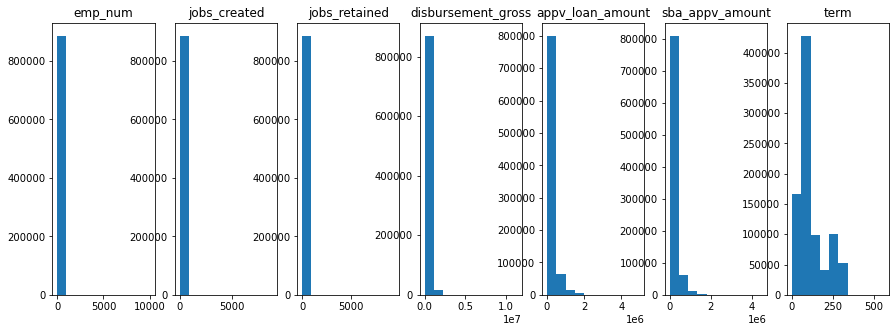

In [29]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(cols,1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist()

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    #plt.ticklabel_format(useOffset=False)
    
plt.show()

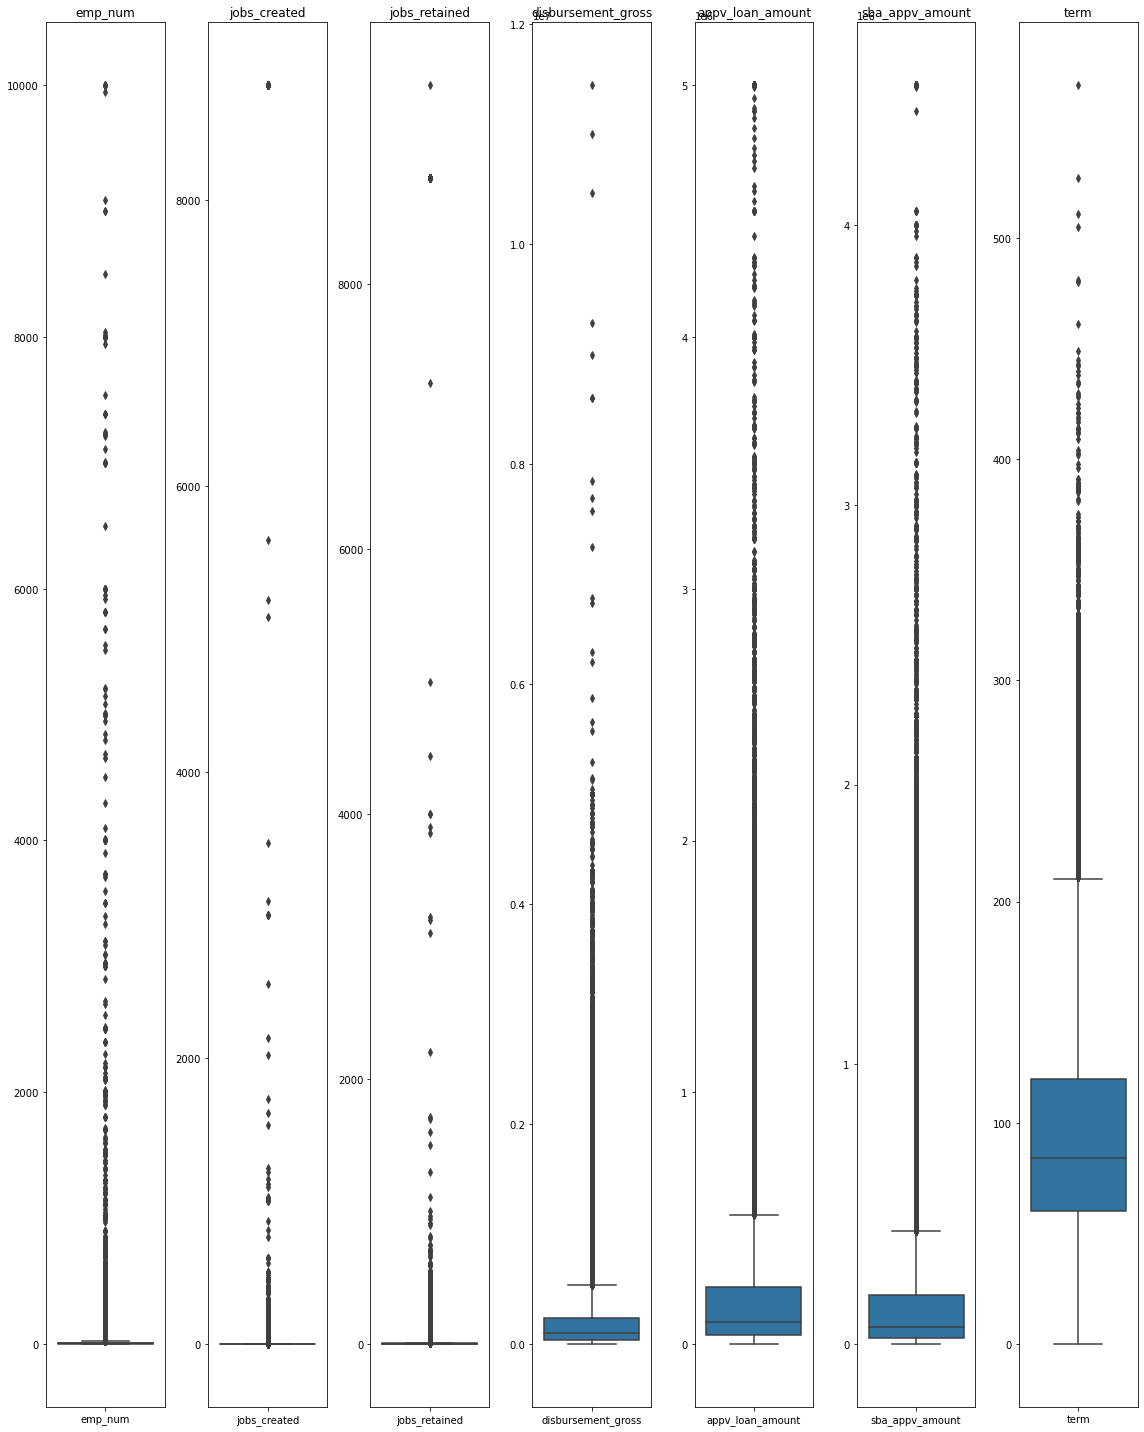

In [30]:
# List of columns
        
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)
    
    # sets proper spacing between plots
    plt.tight_layout()

plt.show()

In [31]:
df.shape

(886240, 26)

In [32]:
# remove outliers from each column in cols_list
for col in cols:

    q1, q3 = df[col].quantile([.25, .75])  # get quartiles

    iqr = q3 - q1   # calculate interquartile range

    upper_bound = q3 + 2 * iqr   # get upper bound
    lower_bound = q1 - 2 * iqr   # get lower bound

    # return dataframe without outliers

    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [33]:
df.shape

(477237, 26)

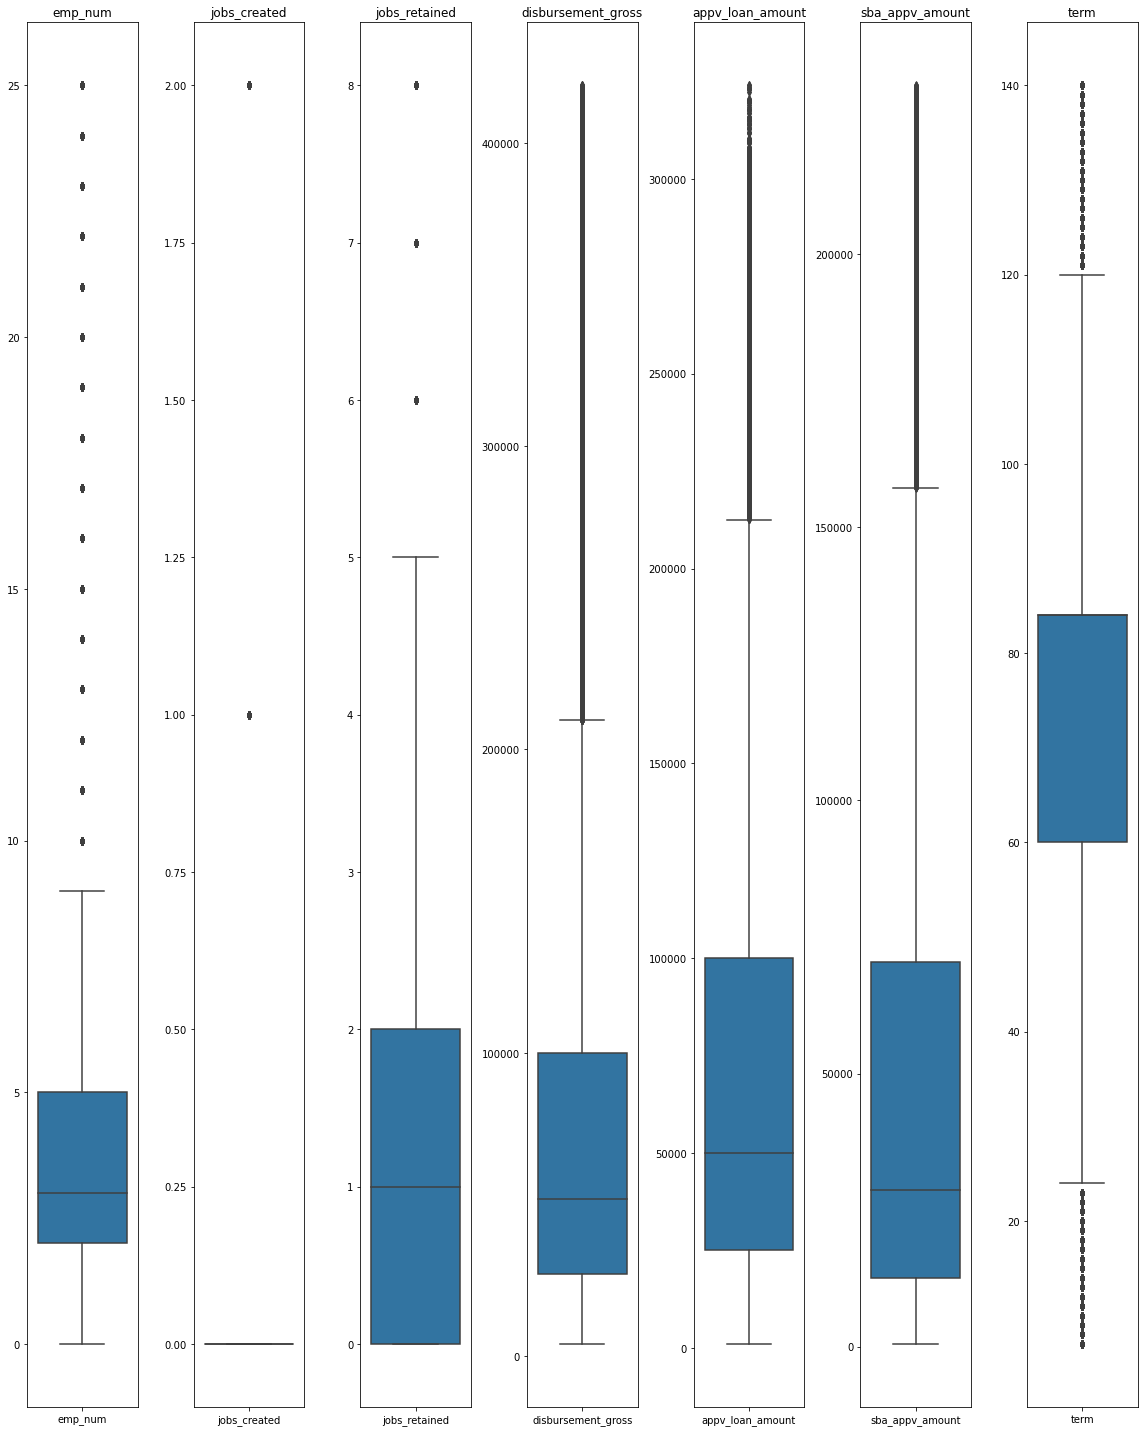

In [34]:
# List of columns
        
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):

    # i starts at 0, but plot nos should start at 1
    plot_number = i

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)
    
    # sets proper spacing between plots
    plt.tight_layout()



## Add Features

In [35]:
# add ratio column for sba approved amount over bank approved amount
df['sba_percent'] = df.sba_appv_amount / df.appv_loan_amount

,loan_id,name,city,state,zip,bank,bank_state,naics,appv_date,appv_fy,...,rev_credit,low_doc,disbursement_date,disbursement_gross,outstanding_gross,loan_status,default_amount,appv_loan_amount,sba_appv_amount,sba_percent
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1970-01-01 00:00:00.000001997,...,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,0.8
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1970-01-01 00:00:00.000001997,...,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,0.8
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1970-01-01 00:00:00.000001997,...,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,0.8
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1970-01-01 00:00:00.000001997,...,N,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0,0.8
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,1997-02-28,1970-01-01 00:00:00.000001997,...,N,Y,1997-04-30,70000.0,0.0,P I F,0.0,70000.0,56000.0,0.8


In [36]:
# add ratio column for debt oustanding to original debt
df['outstanding_debt_percent'] = (df.outstanding_gross / df.appv_loan_amount)

In [37]:
# add ratio column for appv_loan_amount by term 'monthly_debt'
df['monthly_debt'] = round((df.appv_loan_amount / df.term), 2)

In [38]:
# create column for jobs count by adding job created and jobs retained
df['jobs_count'] = (df.jobs_created + df.jobs_retained)

In [39]:
df.shape

(477237, 30)

# <font color = 'red'> Explore & Pre-Processing

## Split

In [40]:
# split data set
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
train.shape, validate.shape, test.shape

((267252, 30), (114537, 30), (95448, 30))

In [41]:
train.columns.to_list()

['loan_id',
 'name',
 'city',
 'state',
 'zip',
 'bank',
 'bank_state',
 'naics',
 'appv_date',
 'appv_fy',
 'term',
 'emp_num',
 'new_existing',
 'jobs_created',
 'jobs_retained',
 'franchise_code',
 'urban_rural',
 'rev_credit',
 'low_doc',
 'disbursement_date',
 'disbursement_gross',
 'outstanding_gross',
 'loan_status',
 'default_amount',
 'appv_loan_amount',
 'sba_appv_amount',
 'sba_percent',
 'outstanding_debt_percent',
 'monthly_debt',
 'jobs_count']

## Multi-Variate Exploration
### Features to Explore First
- appv_loan_amount
- sba_appv_amount
- monthly_debt
- outstanding_debt_percent
- sba_percent
- new_existing
- naics
- emp_num
- jobs_count

Text(0.5, 1.0, 'Loan by Term in Months')

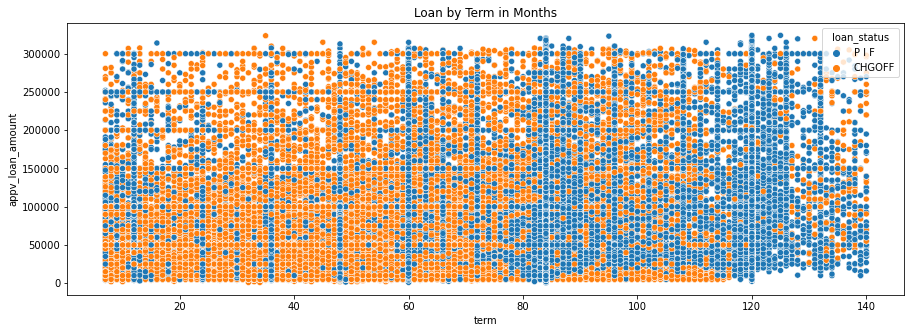

In [43]:
# viz loan amount by term
plt.figure(figsize=(15,5))
sns.scatterplot(data=train, x='term', y='appv_loan_amount', hue='loan_status')
plt.title('Loan by Term in Months')

### Notes:
- Most loans are below 200K
- Defaults seem to appear most undre 150 month terms

In [46]:
train.term.max()

140

In [44]:
asdfasdfasdf

NameError: name 'asdfasdfasdf' is not defined

In [ ]:
df.appv_loan_amount.mean()

In [ ]:
# subset loan amount by term for loans less than 250K
df_loan_mean = df[df.appv_loan_amount <= df.appv_loan_amount.mean()]
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_loan_mean, x='term', y='appv_loan_amount', hue='loan_status')

### Notes:
- Most defaults occur in loans under 90K

In [ ]:
# viz jobs count by 

## Feature Engineering

## Feature Selection

## Scale

## Clustering

## Explore Clustering

# <font color = 'red'> Modeling

## Develop Models

## Evaluate Models

# <font color = 'red'> Delivery

## Conclusion
### Summary
- ??

### Recommendation
- ???

### Next Step
- ???
